In [3]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

In [29]:
from scipy.signal import cheby1,convolve

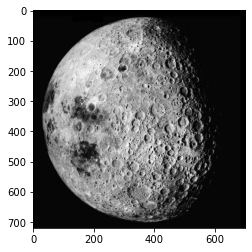

In [4]:
img = cv2.imread('fig/luna.jpg',0)
plt.imshow(img,cmap='gray')

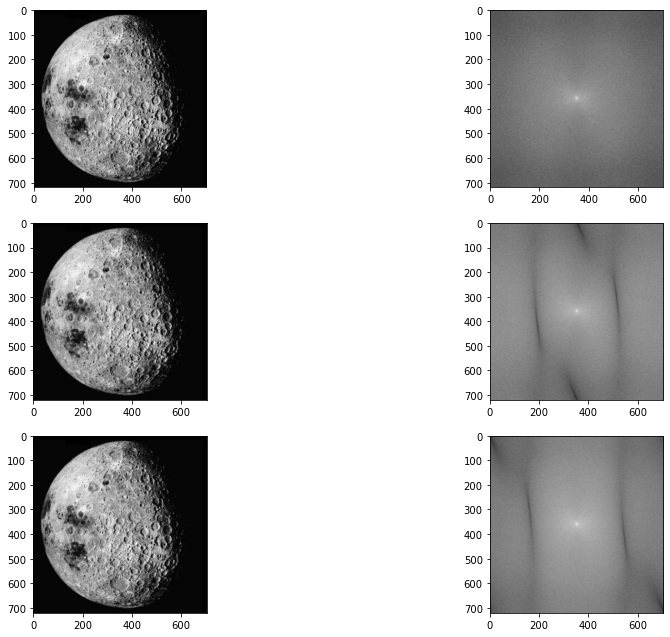

In [52]:
filtro_low=cheby1(3, 5, 0.5, btype='lowpass')#,analog=True)
filtro_high=cheby1(3, 5, 0.5, btype='highpass')#,analog=True)
#filtro_band=cheby1(3, 5, 1000,10000, btype='bandpass',analog=True)
orig_image = cv2.imread('fig/luna.jpg',0)
plt.figure(1,figsize=[15,15])
plt.subplot(421).imshow(img)
plt.subplot(422).imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(orig_image)))))
plt.subplot(423).imshow(convolve(filtro,img))
plt.subplot(424).imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(convolve(filtro_low,img))))))
plt.subplot(425).imshow(convolve(filtro,img))
plt.subplot(426).imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(convolve(filtro_high,img))))))
#plt.subplot(427).imshow(convolve(filtro,img))
#plt.subplot(428).imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(convolve(filtro_band,img))))))


In [50]:
from skimage import exposure
def cheby_1_2d_lp(shape, f, n, rp ,pxd=1): 
    """Designs an n-th order lowpass 2D Butterworth filter with cutoff
    frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
    degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape 
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    
    #cheb = np.polynomial.Chebyshev.basis(n)
    #coef = np.polynomial.chebyshev.cheb2poly(cheb.coef)
    #radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
#     filt = 1 / (1.0 + (radius / f)*((rp*coef[n])**2))
    
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis]) 
    coef = np.cosh(n*(1/np.cosh(radius)))
    
    filt = 1 / (1.0 + (radius / f)*((rp*coef)**2))
    return filt
 
def cheby_1_2d_bp(shape, cutin, cutoff, n, rp,pxd=1):
    """Designs an n-th order bandpass 2D Butterworth filter with cutin and
    cutoff frequencies. pxd defines the number of pixels per unit of frequency
    (e.g., degrees of visual angle)."""
    return cheby_1_2d_lp(shape,cutoff,n,rp,pxd) - cheby_1_2d_lp(shape,cutin,n,rp,pxd)
 
def cheby_1_2d_hp(shape, f, n, rp,pxd=1):
    """Designs an n-th order highpass 2D Butterworth filter with cutin
    frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
    degrees of visual angle)."""
    return 1. - cheby_1_2d_lp(shape, f, n, rp,pxd)

def test():
    """Test the filters."""
    orig_image = cv2.imread('fig/luna.jpg',0)
    fft_orig = np.fft.fftshift(np.fft.fft2(orig_image))
    recon_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_orig)))
    plt.figure(1,figsize=[15,15])
    plt.subplot(431)
    plt.title('Original image')
    plt.imshow(orig_image)
    plt.gray()
    plt.axis('off')
    plt.subplot(432)
    plt.title('FFT (log transformed)')
    plt.imshow(np.log(np.abs(fft_orig)))
    plt.gray()
    plt.axis('off')
    plt.subplot(433)
    plt.title('Reconstructed image')
    plt.imshow(recon_image)
    plt.gray()
    plt.axis('off')
    
    filt = cheby_1_2d_lp(orig_image.shape, 0.2, 2, 5,pxd=43)
    fft_new = fft_orig * filt
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
    new_image = exposure.equalize_hist(new_image)
    
    plt.subplot(434)
    plt.title('Lowpass filter')
    plt.imshow(filt)
    plt.gray()
    plt.axis('off')
    plt.subplot(435)
    plt.title('FFT (log transformed)')
    plt.imshow(np.log(np.abs(fft_new)))
    plt.gray()
    plt.axis('off')
    plt.subplot(436)
    plt.title('Filtered image (histogram equalised)')
    plt.imshow(new_image)
    plt.gray()
    plt.axis('off')
    
    filt = cheby_1_2d_hp(orig_image.shape, 0.2, 2, 5,pxd=43)
    fft_new = fft_orig * filt
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
    new_image = exposure.equalize_hist(new_image)
    
    plt.subplot(437)
    plt.title('Highpass filter')
    plt.imshow(filt)
    plt.gray()
    plt.axis('off')
    plt.subplot(438)
    plt.title('FFT')
    plt.imshow(np.abs(fft_new))
    plt.gray()
    plt.axis('off')
    plt.subplot(439)
    plt.title('Filtered image (histogram equalised)')
    plt.imshow(new_image)
    plt.gray()
    plt.axis('off')
    
    filt = cheby_1_2d_bp(orig_image.shape, 1.50001, 1.50002, 2, 5 ,pxd=43)
    fft_new = fft_orig * filt
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
    new_image = exposure.equalize_hist(new_image)
    
    plt.subplot(4,3,10)
    plt.title('Bandpass filter')
    plt.imshow(filt)
    plt.gray()
    plt.axis('off')
    plt.subplot(4,3,11)
    plt.title('FFT')
    plt.imshow(np.abs(fft_new))
    plt.gray()
    plt.axis('off')
    plt.subplot(4,3,12)
    plt.title('Filtered image (histogram equalised)')
    plt.imshow(new_image)
    plt.gray()
    plt.axis('off')

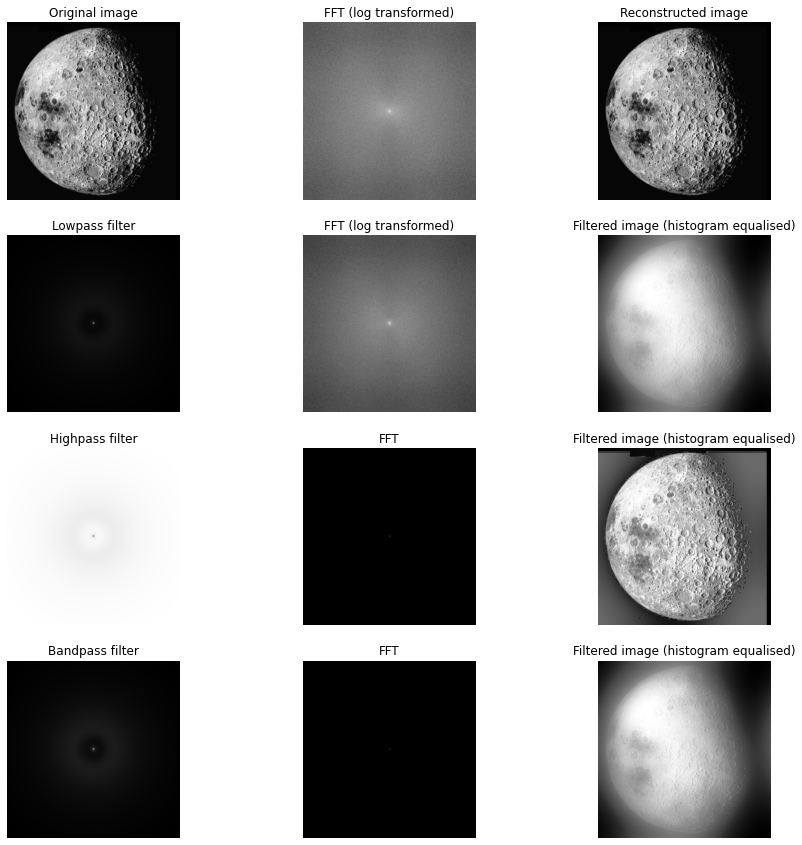

In [51]:
test()

In [40]:

coef

array([  0.,   5.,   0., -20.,   0.,  16.])

In [47]:
cheb = np.polynomial.Chebyshev.basis(5)
coef = np.polynomial.chebyshev.cheb2poly(cheb.coef)
coef[5]

16.0